In [6]:
# import predictions data from file and convert it to a 3D array (most of the lines are just stripping symbols 
# and converting str to int)
file = open("predictions.txt", "r")
lines = file.read().splitlines()
lines = [i.replace("[","") for i in lines]
lines = [i.replace("]","") for i in lines]
lines = [i.split(";") for i in lines]
for i in lines:
    i[0] = i[0].split()
    i[0] = [float(j) for j in i[0]]
    i[1] = i[1].replace(".","")
    i[1] = i[1].split()
    i[1] = [int(j) for j in i[1]]
file.close()

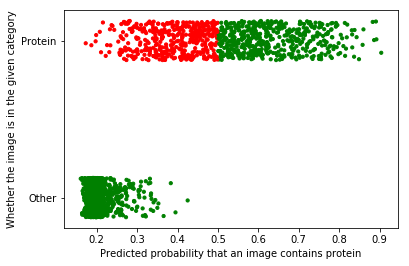

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
# x is the list of predictions that are given out as probabilities. Probabilities of whether something is a protein
x = []
# y is the list of ground truths, 1 = is a protein, 0 = not a protein
y = []
# array of what colour each dot should be
colours = []
# scatter_range used for coordinating scattering the points along the y axis and putting the group labels in 
# the right place
scatter_range = 0.4
for i in lines:
    x.append(i[0][1])
    #generated random number to scatter the points on the plot
    ran_num = random.uniform(0.0, scatter_range)
    # if the image doesn't contain protein:
    #     if the probability that it IS a protein is higher than 0.5 that is a bad result => red in colour
    #     if the probability that it IS a protein is lower than 0.5 that is a good result => green in colour
    if i[1][1]==0:
        num = ran_num-1
        y.append(num)
        if i[0][1] >= 0.5:
            colours.append("r")
        else:
            colours.append("g")
    # if the image does contain protein:
    #     if the probability that it IS a protein is higher than 0.5 that is a good result => green in colour
    #     if the probability that it IS a protein is lower than 0.5 that is a bad result => red in colour
    else:
        num = 1-ran_num
        y.append(num)
        if i[0][1] >= 0.5:
            colours.append("g")
        else:
            colours.append("r")
#plt.scatter(x coordinates are predicted probabilities of that image containing protein,
#            y coordinates are whether the image actually contains protein inc. scattering to make results clearer,
#            c is the array of colours green/red for whether the result is TRUE or FALSE,
#            s is the size of the individual points, reduced from normal to make results clearer)
plt.scatter(x,y,c=colours,s=10)
plt.ylabel("Whether the image is in the given category")
plt.xlabel("Predicted probability that an image contains protein")
# getting rid of numbers on the y axis to make the graph look like it's categorical. Can't be done directly as
# categorical as matplotlib doesn't implement beeswarm graphs
plt.yticks([(1 - (scatter_range/2)),((scatter_range/2) - 1)],["Protein","Other"])
# displays graph. ";" is important because sometimes the image doesn't show without it
plt.show();
    